# Непараметрическая регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
import sklearn.decomposition as decomposition

In [2]:
df = pd.read_csv("data/Duncan.csv", sep=',')
df

,profession,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [3]:
C_type = df.type
type_names = list(C_type.unique())
print(type_names)

C_type_id = C_type.apply(lambda x: type_names.index(x)+1)
C_type_id = C_type_id.values
print(C_type_id)

['prof', 'wc', 'bc']
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3]


In [4]:
X_income = df.income.values
X_income_s = X_income.reshape(-1,1)
Y_prestige = df.prestige.values

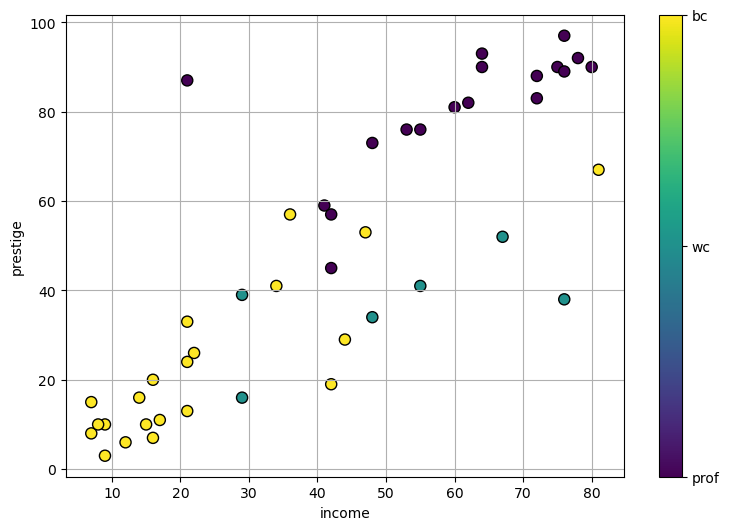

In [6]:
plt.figure(figsize=(9,6))
cs = plt.scatter(X_income, Y_prestige, s=64, c=C_type_id, edgecolors='k')
cb = plt.colorbar(cs)
cb.set_ticks([1,2,3])
cb.set_ticklabels(type_names)
plt.grid(1)
plt.xlabel('income')
plt.ylabel('prestige')
plt.show()

In [9]:
clf1 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')
clf1.fit(X_income_s, Y_prestige)
clf2 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
clf2.fit(X_income_s, Y_prestige)

KNeighborsRegressor(n_neighbors=15, weights='distance')

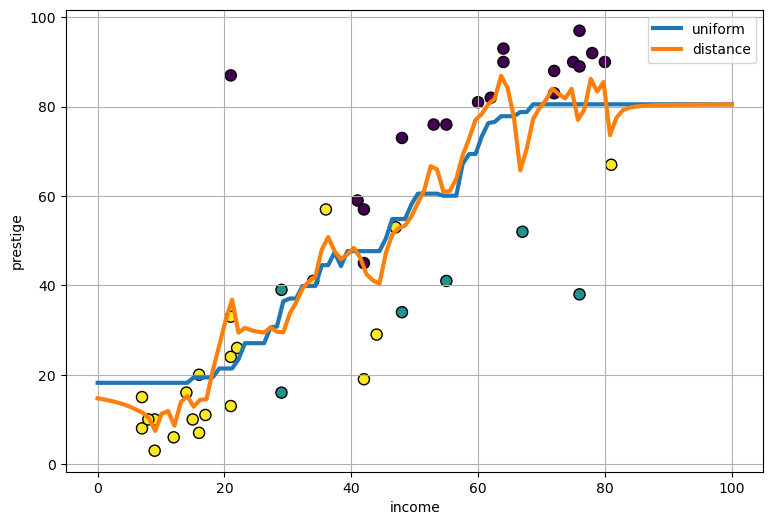

In [10]:
range_x = np.linspace(0., 100., 100)
range_xs = range_x.reshape(-1,1)

plt.figure(figsize=(9,6))
plt.scatter(X_income, Y_prestige, s=64, c=C_type_id, edgecolors='k')
plt.plot(range_x, clf1.predict(range_xs), label='uniform', linewidth=3.0)
plt.plot(range_x, clf2.predict(range_xs), label='distance', linewidth=3.0)
plt.grid(1)
plt.xlabel('income')
plt.ylabel('prestige')
plt.legend()
plt.show()

In [11]:
X_education = df.education.values
X_education_s = X_education.reshape(-1,1)
Y_prestige = df.prestige.values

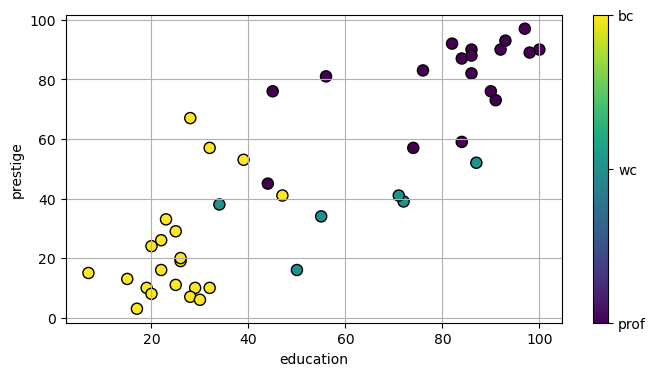

In [12]:
plt.figure(figsize=(8,4))
cs = plt.scatter(X_education, Y_prestige, s=64, c=C_type_id, edgecolors='k')
cb = plt.colorbar(cs)
cb.set_ticks([1,2,3])
cb.set_ticklabels(type_names)
plt.grid(1)
plt.xlabel('education')
plt.ylabel('prestige')
plt.show()

In [15]:
clf21 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')
clf21.fit(X_education_s, Y_prestige)
clf22 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
clf22.fit(X_education_s, Y_prestige)

KNeighborsRegressor(n_neighbors=15, weights='distance')

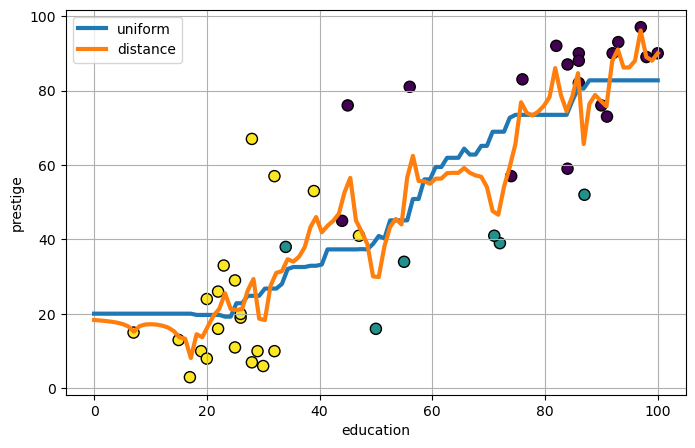

In [16]:
range_x = np.linspace(0, 100, 100)
range_xs = range_x.reshape(-1,1)

plt.figure(figsize=(8,5))
plt.scatter(X_education, Y_prestige, s=64, c=C_type_id, edgecolors='k')
plt.plot(range_x, clf21.predict(range_xs), label='uniform', linewidth=3.)
plt.plot(range_x, clf22.predict(range_xs), label='distance', linewidth=3.)
plt.grid(1)
plt.xlabel('education')
plt.ylabel('prestige')
plt.legend()
plt.show()

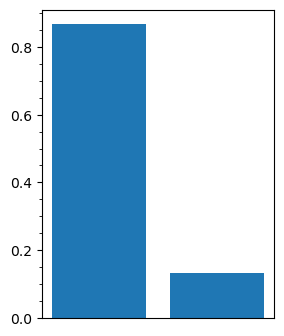

In [17]:
U = np.c_[X_income, X_education]
pca = decomposition.PCA()
pca.fit(U)

plt.figure(figsize=(3,4))
plt.bar(range(2), pca.explained_variance_ratio_)
plt.xticks([])
plt.minorticks_on()
plt.show()

In [19]:
U1 = pca.transform(U)

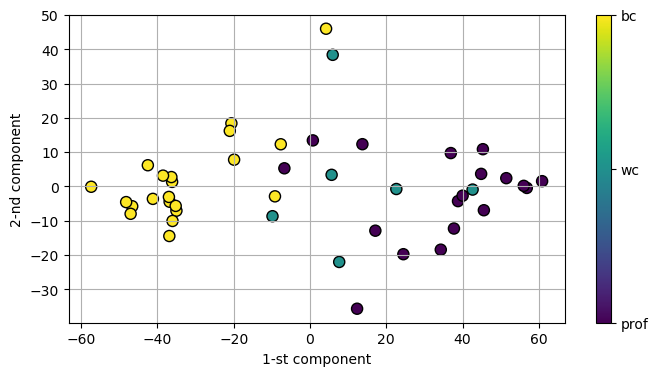

In [20]:
plt.figure(figsize=(8,4))
cs = plt.scatter(U1[:,0], U1[:,1], s=64, c=C_type_id, edgecolors='k')
cb = plt.colorbar(cs)
cb.set_ticks([1,2,3])
cb.set_ticklabels(type_names)
plt.grid(1)
plt.xlabel('1-st component')
plt.ylabel('2-nd component')
plt.show()

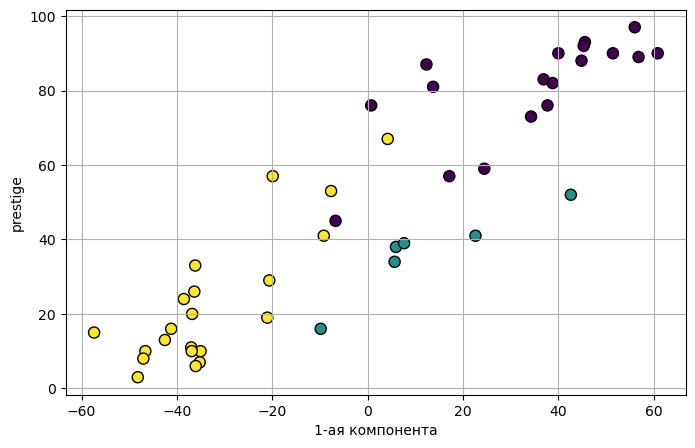

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(U1[:,0], Y_prestige, s=64, c=C_type_id, edgecolors='k')
plt.grid(1)
plt.ylabel('prestige')
plt.xlabel('1-ая компонента')
plt.show()

In [24]:
clf41 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')
clf41.fit(U1[:,0:1], Y_prestige)
clf42 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
clf42.fit(U1[:,0:1], Y_prestige)

KNeighborsRegressor(n_neighbors=15, weights='distance')

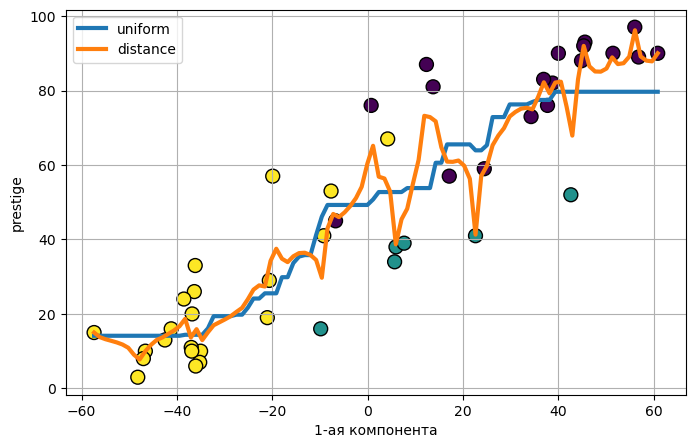

In [25]:
range_u = np.linspace(U1[:,0].min(), U1[:,0].max(), 100)
range_us = range_u.reshape(-1,1)

plt.figure(figsize=(8,5))
plt.scatter(U1[:,0], Y_prestige, s=100, c=C_type_id, edgecolors='k')
plt.plot(range_u, clf41.predict(range_us), linewidth=3.0, label='uniform')
plt.plot(range_u, clf42.predict(range_us), linewidth=3.0, label='distance')
plt.grid(1)
plt.ylabel('prestige')
plt.xlabel('1-ая компонента')
plt.legend()
plt.show()

In [26]:
animals = pd.read_csv("data/Animals2.csv", sep=",")
animals

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
...,...,...,...
60,Brazilian tapir,160.000,169.0
61,Tenrec,0.900,2.6
62,Phalanger,1.620,11.4
63,Tree shrew,0.104,2.5


In [27]:
X = np.log(animals['body'].values)
Y = np.log(animals['brain'].values)

In [32]:
clf_au = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')
clf_au.fit(X[:,None], Y)
clf_ad = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
clf_ad.fit(X[:,None], Y)

KNeighborsRegressor(n_neighbors=15, weights='distance')

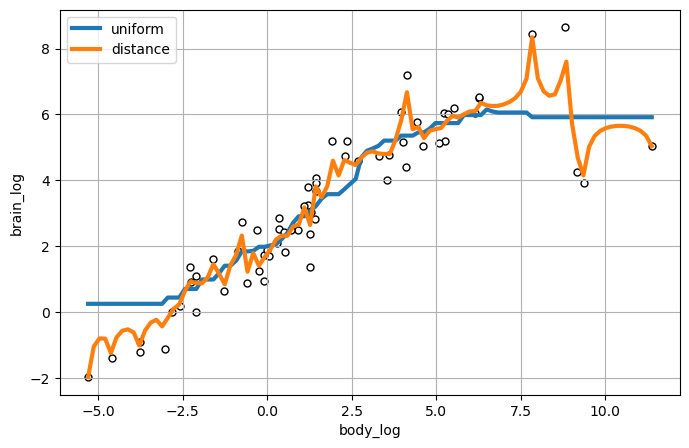

In [33]:
range_u = np.linspace(X.min(), X.max(), 100)
range_us = range_u.reshape(-1,1)

plt.figure(figsize=(8,5))
plt.scatter(X, Y, s=25, c='w', edgecolors='k')
plt.plot(range_u, clf_au.predict(range_us), linewidth=3.0, label='uniform')
plt.plot(range_u, clf_ad.predict(range_us), linewidth=3.0, label='distance')
plt.grid(1)
plt.ylabel('brain_log')
plt.xlabel('body_log')
plt.legend()
plt.show()

/tmp/ipykernel_3975/835267019.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


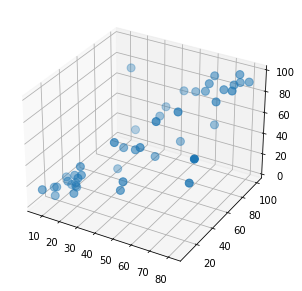

In [27]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca(projection='3d')
ax.scatter(X_income, X_education, Y_prestige, s=64)
plt.show()

In [28]:
X = np.c_[X_income, X_education]

In [29]:
clf3d = neighbors.KNeighborsRegressor(n_neighbors=11)
clf3d.fit(X, Y_prestige)

KNeighborsRegressor(n_neighbors=11)

In [30]:
xrange = np.linspace(0,100,100)
yrange = np.linspace(0,100,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = clf3d.predict(XY)
ZZ = Z.reshape(XX.shape)

/tmp/ipykernel_3975/317924422.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


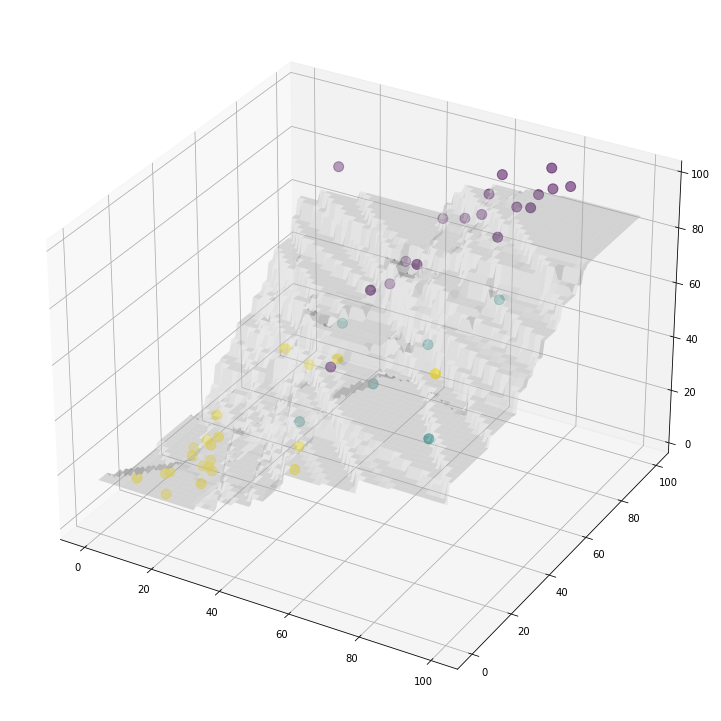

In [31]:
fig = plt.figure(figsize=(15,13))
ax = fig.gca(projection='3d')
ax.scatter(X_income, X_education, Y_prestige, s=100, c=C_type_id)
ax.plot_surface(XX, YY, ZZ, color='LightGrey', alpha=0.4)
plt.show()

In [34]:
stackloss_df = pd.read_csv("data/stackloss.csv", sep=',')
stackloss_df

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87
5,18,62,23,87
6,19,62,24,93
7,20,62,24,93
8,15,58,23,87
9,14,58,18,80


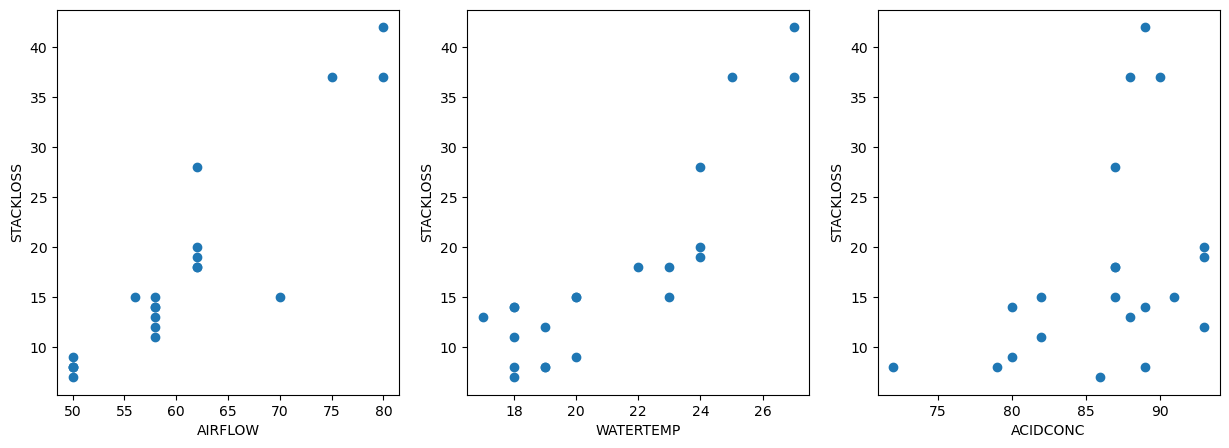

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(stackloss_df.AIRFLOW, stackloss_df.STACKLOSS)
plt.ylabel('STACKLOSS')
plt.xlabel('AIRFLOW')
plt.subplot(1, 3, 2)
plt.scatter(stackloss_df.WATERTEMP, stackloss_df.STACKLOSS)
plt.ylabel('STACKLOSS')
plt.xlabel('WATERTEMP')
plt.subplot(1, 3, 3)
plt.scatter(stackloss_df.ACIDCONC, stackloss_df.STACKLOSS)
plt.ylabel('STACKLOSS')
plt.xlabel('ACIDCONC')
plt.show()

### Задача 10

На метод непараметрической регрессии.

1. Восстановить регрессионные зависомости STACKLOSS от AIRFLOW и WATERCOMP (по-отдельности). Визуализировать результат восстановления регрессии.
2. Используя метод главных компонент преобразовать исходные 2-мерные данные (AIRFLOW, WATERCOMP) в одномерные данные, использовав проекции на главную компоненту.
3. Восстановить регрессионные зависомости STACKLOSS от главной компоненты. Визуализировать результат восстановления регрессии.
